In [ ]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install sklearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [34]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Epoch 1/100
19/19 [==============================] - 2s 19ms/step - loss: 1.1337 - accuracy: 0.4689 - val_loss: 0.6809 - val_accuracy: 0.5930
Epoch 2/100
19/19 [==============================] - 0s 8ms/step - loss: 0.9024 - accuracy: 0.5798 - val_loss: 0.6635 - val_accuracy: 0.6221
Epoch 3/100
19/19 [==============================] - 0s 8ms/step - loss: 0.7899 - accuracy: 0.6269 - val_loss: 0.6416 - val_accuracy: 0.6686
Epoch 4/100
19/19 [==============================] - 0s 8ms/step - loss: 0.7799 - accuracy: 0.6454 - val_loss: 0.6191 - val_accuracy: 0.7151
Epoch 5/100
19/19 [==============================] - 0s 8ms/step - loss: 0.6924 - accuracy: 0.6487 - val_loss: 0.6004 - val_accuracy: 0.7384
Epoch 6/100
19/19 [==============================] - 0s 8ms/step - loss: 0.6269 - accuracy: 0.7109 - val_loss: 0.5832 - val_accuracy: 0.7674
Epoch 7/100
19/19 [==============================] - 0s 7ms/step - loss: 0.6906 - accuracy: 0.6571 - val_loss: 0.5652 - val_accuracy: 0.7791
Epoch 8/100


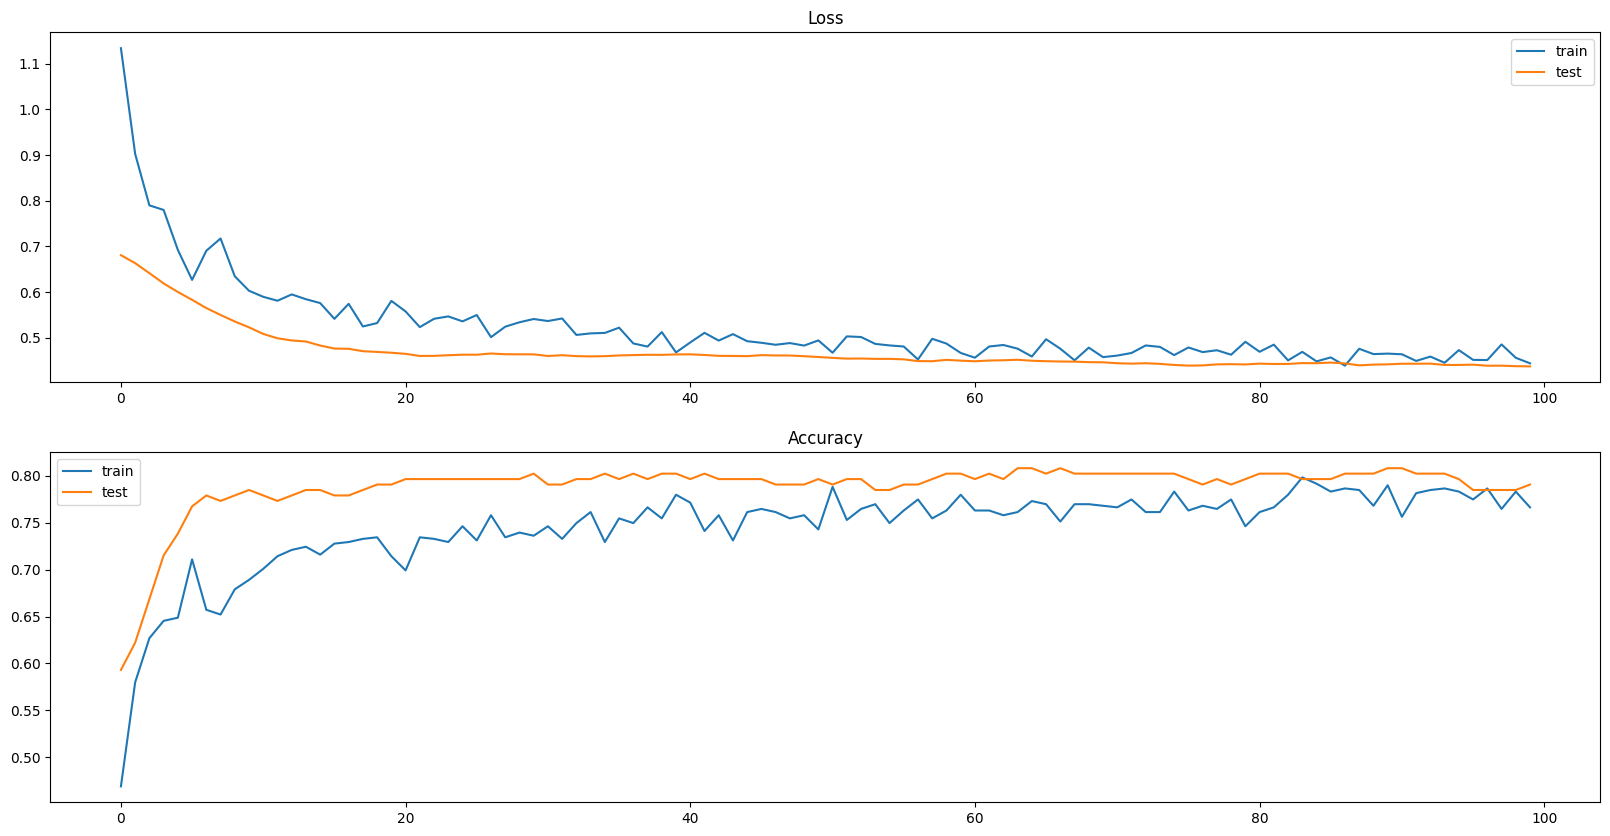

In [38]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization
from sklearn.metrics import recall_score
from keras.layers import Dropout
from sklearn.preprocessing import StandardScaler
from keras.optimizers import Adam
from keras.models import Model
from keras.layers import Input, Dense

# Load the dataset
df = pd.read_csv('/content/gdrive/MyDrive/Dataset_challenge.csv')
skinthickness = df['SkinThickness'].median()
insulin = df['Insulin'].median()

# Thay thế các giá trị 0 bằng trung vị tương ứng
df['SkinThickness'] = df['SkinThickness'].replace(0, skinthickness)
df['Insulin'] = df['Insulin'].replace(0, insulin)
scaler = StandardScaler()
data = pd.DataFrame(df)
normalize = ['Glucose', 'BloodPressure','Insulin','SkinThickness', 'BMI','DiabetesPedigreeFunction','Age',"Pregnancies"]
data[normalize] = scaler.fit_transform(df[normalize])

# Split the dataset into training and testing sets
X_train = data.iloc[:595, :-1]
Y_train = data.iloc[:595, -1]
X_test = data.iloc[596:, :-1]
Y_test = data.iloc[596:, -1]


# Create the model
class CustomAdam(Adam):
    def __init__(self, learning_rate=0.001, **kwargs):
        super().__init__(**kwargs)
        self.learning_rate = learning_rate

model = keras.Sequential()

dense_1=Dense(128, activation='relu', input_shape=(X_train.shape[1],))
model.add(dense_1)
model.add(BatchNormalization())
model.add(Dropout(0.5))

dense_2=Dense(64, activation='relu')
model.add(dense_2)

model.add(BatchNormalization())
model.add(Dropout(0.5))

dense_3=Dense(32, activation='relu')
model.add(dense_3)
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(1, activation='sigmoid'))



# Thiết lập learning rate cho từng optimizer của từng layer
optimizer1 = CustomAdam(learning_rate=0.001)
optimizer2 = CustomAdam(learning_rate=0.0001)
optimizer3 = CustomAdam(learning_rate=0.001)
# Compile mô hình với các optimizer tương ứng cho từng layer
optimizer = {'dense_1': optimizer1, 'dense_2': optimizer2, 'dense_3': optimizer3}
# Compile the model with the optimizer dictionary
model.compile(optimizer=optimizer1, loss='binary_crossentropy', metrics=['accuracy'])
# Compile the model


# Train the model
history = model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_data=(X_test, Y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, Y_test)
Y_pred = (model.predict(X_test) > 0.5).astype("int32")
recall = recall_score(Y_test, Y_pred)
print('Accuracy:', accuracy)
print('Loss:', loss)
print('Recall:', recall)

# Get the number of trainable parameters
# plot loss và accuracy
plt.figure(figsize=(20,10))
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()


In [22]:
import Dataset_challenge

ModuleNotFoundError: No module named 'Dataset_challenge'